# Project: Medical Appointments No-Show Analysis
## Prepared By: Harsh Navin Gupta

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The dataset selected for this analysis is the **Medical Appointment No Show** dataset, which can be found on [Kaggle](https://www.kaggle.com/joniarroba/noshowappointments). This dataset contains information about the appointments taken by the Clinc's patients.The dataset provides information such as Appointment Information, Information about Patient and whether the Patient was a No-Show or Not.<br>
This project focuses on analysing and understanding how likely is a patient to show-up at an appointment. This analysis is provided by exploring the data visually and identifying the relation between the various features provided in the dataset.<br>
### Questions
1. Are Patients who receive an SMS less likely to be a No-Show ?
2. Is the likelihood of No-Show affected by the Patient's Age ?
3. Does the Gender of the Patients affect the likelihood of No-Shows ?
4. Is the likelihood of No-Show of an Alocholic Patient higher than a Non-Alcoholic Patient ?
5. Are the Diabetic Patients less likely to be a No-Show ?
6. Are the Hypertensive Patients less likely to be a No-Show ?
7. Is the likelihood of No-Show affected if the Patient is Handicapped ?
8. Do the patients who receive Scholarship less likely to be a No-Show ?
9. Does the day of the appointment affect the likelihood of No-Shows ?

In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [2]:
# Loading Data Into Notebook
df = pd.read_csv('dataset.csv')

In [3]:
# Printing Dataset Head
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# Printing Dataset Shape
print('Dataset Shape :', df.shape)

Dataset Shape : (110527, 14)


Number of Rows : 110527<br>
Number of Columns : 14

### Checking Dataset for Duplicated Rows

Every row in the dataset represents, an appointment. Since it is possible a single patient can have multiple appointments, **PatientId** cannot be used to identify duplicated appointment entries. Hence, **AppointmentID** will be used to identify duplicated appointments in the dataset, since it is an unique identifier for every appointment.

In [5]:
# Counting Number of Duplicate Rows
dupli_count = df.duplicated(subset=['AppointmentID']).sum()
print('Number of Duplicated Rows :', dupli_count)

Number of Duplicated Rows : 0


Since, there no duplicated appointment entries in the dataset, no rows will be dropped.

### Checking Dataset for Missing Values

In [6]:
# Counting Number of Missing Values in Each Column
missing_count = df.isnull().sum()
print(missing_count)

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


It can be observed that none of the features contain any missing values. This means no rows will have to dropped from the dataset.

### Dropping Non-Required Columns

Two columns of the dataset, **PatientId** and **AppointmentID** are columns which store unique identifiers for the Patient and Appointment respectively. These columns are not deemed to be useful for analysis of No-Shows, and hence are being dropped from the dataset.

In [7]:
# Dropping Columns
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

It can be observed that the column **ScheduledDay** is used to feature when an appointment was registered. However it is deemed that instead of the appointment registration time, **AppointmentDay** which indicates the day of the appointment is more important for the analysis. Hence, the column **ScheduledDay** is being dropped.

In [8]:
# Dropping Appointment Day Column
df.drop(['ScheduledDay'], axis=1, inplace=True)

In [9]:
# Verifying the Column Drop Operation
print('Dataset Shape :', df.shape)

Dataset Shape : (110527, 11)


Since, the number of columns have been reduced by 3, it can seen that the columns were dropped successfully.

### Correcting Data in Handcap Column

In [10]:
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

The **HandCap Column** in the dataset, is used to indicate whether the particular patient is *Handicapped or Not*. However, as observed above, the column contains not only 0 and 1, but other integers as values as well.<br>
Thus, for the values in this column, all entries for 0 will be kept as it is, and all entries for >=1 will be converted to 1, to indicate that the patient is hypertensive.

In [11]:
# Changing all values >=1 to 1
df.loc[df['Handcap'] >= 1, 'Handcap'] = 1

In [12]:
# Confirming Changes
df['Handcap'].value_counts()

0    108286
1      2241
Name: Handcap, dtype: int64

### Checking Datatypes for All Features

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
Gender            110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: int64(7), object(4)
memory usage: 9.3+ MB


It can be observed that the column **AppointmentDay** is a feature that stores the date for the appointment, but it stored as an object, which is an incorrect datatype. 

In [14]:
# Converting AppointmentDay to datetime format
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [15]:
# Confirming Operation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
Gender            110527 non-null object
AppointmentDay    110527 non-null datetime64[ns, UTC]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns, UTC](1), int64(7), object(3)
memory usage: 9.3+ MB


### Adding New Column : Appointment Day of Week

The new column **Appointment_WeekDay** will store the name of the day of week, for which the appointment was scheduled.

In [16]:
# Adding New Column
df['Appointment_WeekDay'] = df['AppointmentDay'].dt.weekday_name

In [17]:
# Checking Dataframe Head
df.head()

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Appointment_WeekDay
0,F,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,M,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
2,F,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
3,F,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
4,F,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday


<a id='eda'></a>
## Exploratory Data Analysis

In [18]:
# Defining Function to Obtain Proportions of Feature With Relation to No-Shows
def get_counts(feature_name):
    # Storing Counts for No-Shows By Grouping on Feature_Name and No-Show
    counts = df.groupby([feature_name, 'No-show']).count().iloc[:,0]
    # Total Counts for No-show in Dataset
    total = df.groupby([feature_name]).count().iloc[:,0]
    # Generating Counts/Total
    counts = counts/total
    # Returning counts
    return counts

### Are Patients who receive an SMS less likely to be a No-Show ?

In [19]:
# Storing Counts for No-Shows By Grouping on SMS-Received and No-Show
counts = get_counts('SMS_received')

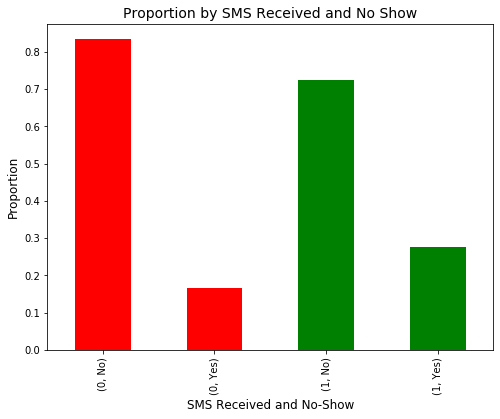

In [20]:
color_list = ['red', 'red', 'green', 'green']
counts.plot(kind='bar', color=color_list, figsize=(8,6))
plt.title('Proportion by SMS Received and No Show', fontsize=14)
plt.xlabel('SMS Received and No-Show', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.show()

From the above visualisation it can be seen that, the patients who **Recieved SMS** have a higher proportion of *No-Shows* in comparison to patients who did not recieve the SMS.<br>
Thus, it can be said that, **Recieving an SMS** has an impact on No-Show, and patients who received SMS are more likely to be a No Show at the appointment.

### Is the likelihood of No-Show affected by the Patient's Age ?

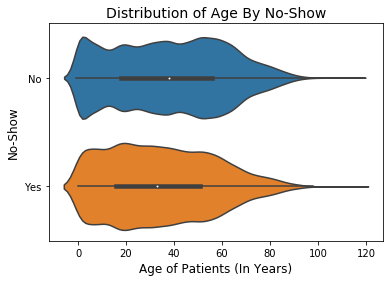

In [21]:
sns.violinplot(x='Age', y='No-show', data=df)
plt.title('Distribution of Age By No-Show', fontsize=14)
plt.xlabel('Age of Patients (In Years)', fontsize=12)
plt.ylabel('No-Show', fontsize=12)
plt.show()

From the above *Violin Plot* it can be observed that **No Relation** is seen between the *Age of Patients* and *Appointment No-Show*.<br>
Thus, it can be said that the Age of the patient has no effect on the Appointment No-Show.

### Does the Gender of the Patients affect the likelihood of No-Shows ?

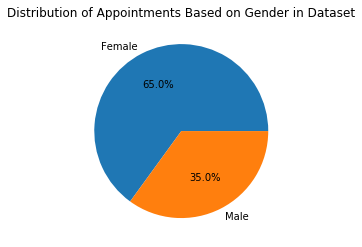

In [22]:
# Calculating Counts of Gender Column in Dataset
gender_counts = df['Gender'].value_counts()
plt.Figure(figsize=(10, 10))
plt.pie(gender_counts.values, labels=['Female', 'Male'], autopct='%1.1f%%')
plt.title('Distribution of Appointments Based on Gender in Dataset')
plt.show()

From the above *Pie Chart*, it can be seen that the Clinic has **Higher Female Patient Appointments over Male Patients**.

In [23]:
# Storing Counts for No-Shows By Grouping on Gender and No-Show
counts = get_counts('Gender')

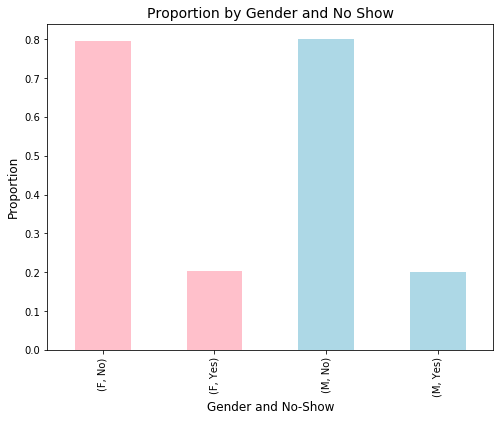

In [24]:
color_list = ['pink', 'pink', 'lightblue', 'lightblue']
counts.plot(kind='bar', color=color_list, figsize=(8,6))
plt.title('Proportion by Gender and No Show', fontsize=14)
plt.xlabel('Gender and No-Show', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.show()

From the above plot, it can be seen that for both the genders, *Proportion of No-Shows* is similar, and thus, it can be said that the **Patient's Gender** does not affect the likelihood of No-show at Medical Appointments.

### Is the likelihood of No-Show of an Alocholic Patient higher than a Non-Alcoholic Patient ?

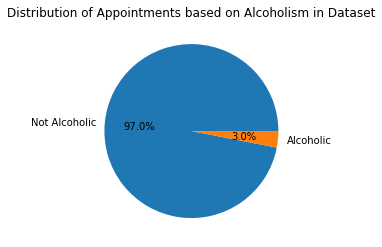

In [25]:
# Calculating Counts of Alcoholism Column in Dataset
al_counts = df['Alcoholism'].value_counts()
plt.Figure(figsize=(10, 10))
plt.pie(al_counts.values, labels=['Not Alcoholic', 'Alcoholic'], autopct='%1.1f%%')
plt.title('Distribution of Appointments based on Alcoholism in Dataset')
plt.show()

Very few of the Clinic's Appointments are for **Alcoholic Patients** constituing only *3%* of the total appointments.

In [26]:
# Storing Counts for No-Shows By Grouping on Alcoholism and No-Show
counts = get_counts('Alcoholism')

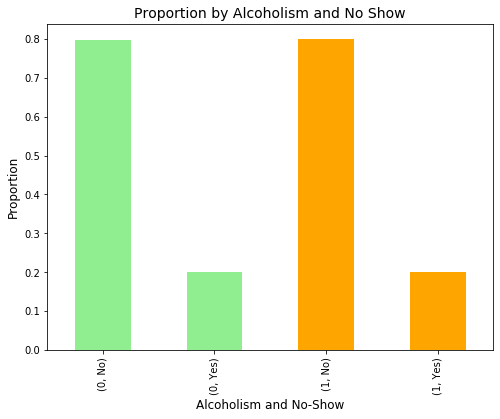

In [27]:
color_list = ['lightgreen', 'lightgreen', 'orange', 'orange']
counts.plot(kind='bar', color=color_list, figsize=(8,6))
plt.title('Proportion by Alcoholism and No Show', fontsize=14)
plt.xlabel('Alcoholism and No-Show', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.show()

From the above plot, it can be seen that **No Relation** can be seen between Alcoholism and No-Shows. It can be observed that Alocholic patients do not have higher proportion of No-Shows, and neither to Non-Alcoholic Patients have lower proportions of No-Shows.<br>
Thus, **Alcoholic Patients** and **Non-Alcoholic Patients** are equally likely to be a No-Show.

### Are the Diabetic Patients less likely to be a No-Show ?

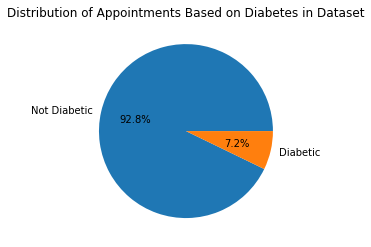

In [28]:
# Calculating Counts of Diabetic Patients Column in Dataset
db_counts = df['Diabetes'].value_counts()
plt.Figure(figsize=(10, 10))
plt.pie(db_counts.values, labels=['Not Diabetic', 'Diabetic'],autopct='%1.1f%%')
plt.title('Distribution of Appointments Based on Diabetes in Dataset')
plt.show()

It can be observed that majority of the Clinic's appointments are for **Not Diabetic Patients**.

In [29]:
# Storing Counts for No-Shows By Grouping on Diabetes and No-Show
counts = get_counts('Diabetes')

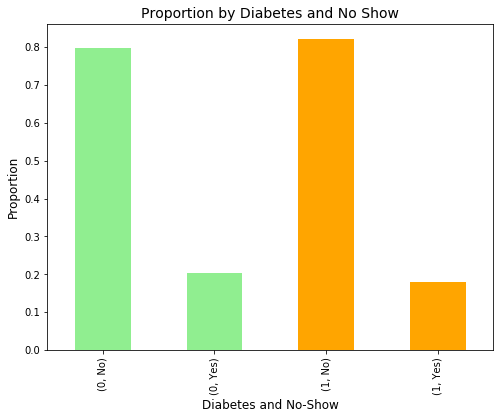

In [30]:
color_list = ['lightgreen', 'lightgreen', 'orange', 'orange']
counts.plot(kind='bar', color=color_list, figsize=(8,6))
plt.title('Proportion by Diabetes and No Show', fontsize=14)
plt.xlabel('Diabetes and No-Show', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.show()

From the above plot, it can be observed that **Diabetic Patients** have a lower proportion of *No-Shows* when compared to **Non-Diabetic Patients**.<br>Thus, it can be said diabetes has an effect on likelihood of No-Shows, and **Diabetic Patients** are less likely to be a No-Show when compared to **Non Diabetic Patients**.

### Are the Hypertensive Patients less likely to be a No-Show ?

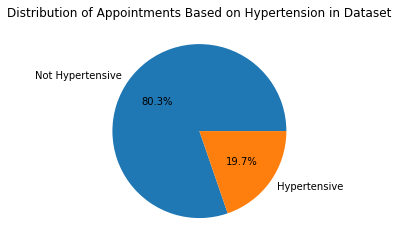

In [31]:
# Calculating Counts of Hypertensive Patients Column in Dataset
ht_counts = df['Hipertension'].value_counts()
plt.Figure(figsize=(10, 10))
plt.pie(ht_counts.values, labels=['Not Hypertensive', 'Hypertensive'],autopct='%1.1f%%')
plt.title('Distribution of Appointments Based on Hypertension in Dataset')
plt.show()

It can be observed from the above *Pie Chart* that almost **1/5th of the Clinic's Appointments were for  Hypertensive Patients**.

In [32]:
# Storing Counts for No-Shows By Grouping on Hypertensive and No-Show
counts = get_counts('Hipertension')

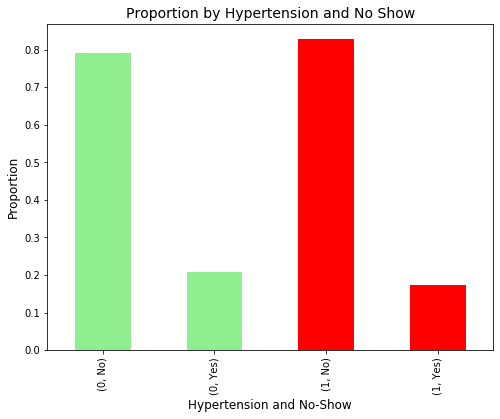

In [33]:
color_list = ['lightgreen', 'lightgreen', 'red', 'red']
counts.plot(kind='bar', color=color_list, figsize=(8,6))
plt.title('Proportion by Hypertension and No Show', fontsize=14)
plt.xlabel('Hypertension and No-Show', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.show()

It can be observed that, **Hypertensive Patients** have *Lower Proportions* of No-Shows when compared to **Non-Hypertensive Patients**.<br>Thus, it can be observed Hypertension has an effect on likelihood of No-Shows, and **Hypertensive Patients** are less likely to be a No-Show in comparison to **Non Hypertensive Patients**.

### Is the likelihood of No-Show affected if the Patient is Handicapped ?

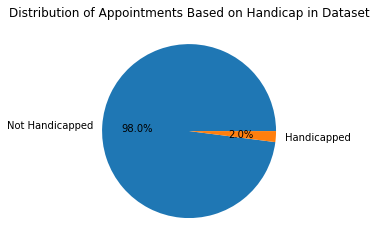

In [34]:
# Calculating Counts of Hypertensive Patients Column in Dataset
hd_counts = df['Handcap'].value_counts()
plt.Figure(figsize=(10, 10))
plt.pie(hd_counts.values, labels=['Not Handicapped', 'Handicapped'],autopct='%1.1f%%')
plt.title('Distribution of Appointments Based on Handicap in Dataset')
plt.show()

It can observed from the above *Pie Chart* that, very few appointments in the clinic were for **Handicapped Patients**.

In [35]:
# Storing Counts for No-Shows By Grouping on Handicap and No-Show
counts = get_counts('Handcap')

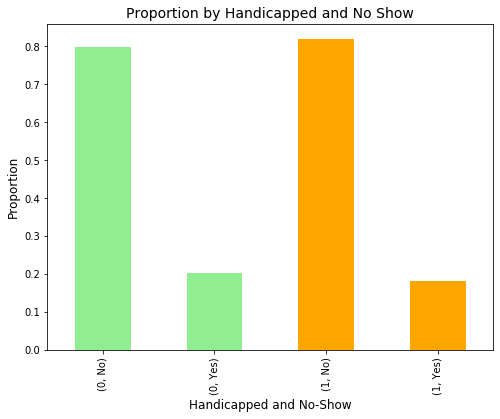

In [36]:
color_list = ['lightgreen', 'lightgreen', 'orange', 'orange']
counts.plot(kind='bar', color=color_list, figsize=(8,6))
plt.title('Proportion by Handicapped and No Show', fontsize=14)
plt.xlabel('Handicapped and No-Show', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.show()

It can be clearly observed that **Handicapped Patients** have a lower proportion of No-Shows when compared to **Non Handicapped Patients**.<br>Thus it can be said that Handicap has an effect on No-Shows, and **Handicapped Patients** are less likely to be a No-Show.

### Do the patients who receive Scholarship less likely to be a No-Show ?

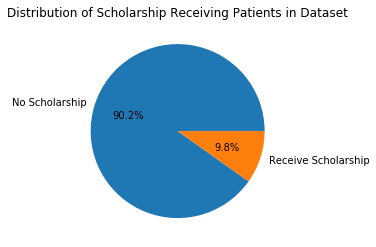

In [37]:
# Calculating Counts of Scholarship Receiving Patients Column in Dataset
sch_counts = df['Scholarship'].value_counts()
plt.Figure(figsize=(10, 10))
plt.pie(sch_counts.values, labels=['No Scholarship', 'Receive Scholarship'], autopct='%1.1f%%')
plt.title('Distribution of Scholarship Receiving Patients in Dataset')
plt.show()

From the above *Pie Chart* it can be observed that majority of the Clinic's appointments were for patients who **Do Not Receive Scholarships**. 

In [38]:
# Storing Counts for No-Shows By Grouping on Scholarship and No-Show
counts = get_counts('Scholarship')

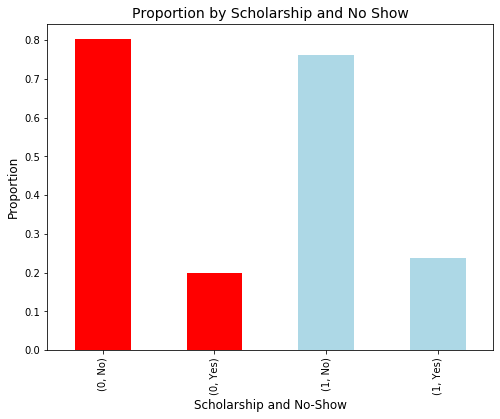

In [39]:
color_list = ['red', 'red', 'lightblue', 'lightblue']
counts.plot(kind='bar', color=color_list, figsize=(8,6))
plt.title('Proportion by Scholarship and No Show', fontsize=14)
plt.xlabel('Scholarship and No-Show', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.show()

It can be seen that, the patients who **Receive Scholarship** have a *Slightly Higher* No-Show Proportion in comparsion to patients who **Do Not Receive Scholarship**.<br>
Thus it can be said, that the receipt of scholarship may have a slight effect on No-Shows, and **Patients who Receive Scholarship** are more likely to be a No-Show.

### Does the day of the appointment affect the likelihood of No-Shows ?

In [40]:
# Displaying Total Number of Appointments for Each Weekday
print(df['Appointment_WeekDay'].value_counts())

Wednesday    25867
Tuesday      25640
Monday       22715
Friday       19019
Thursday     17247
Saturday        39
Name: Appointment_WeekDay, dtype: int64


From the above table, it can be seen that the Clinic is the **Busiest** on *Wednesday & Tuesday*, whereas on *Saturday*, the clinic has **Very Few Appointments**.

In [41]:
# Storing Counts for No-Shows By Grouping on Appointment Day of Week and No-Show
counts = get_counts('Appointment_WeekDay')

In [42]:
# Reordering the Counts Proportions, according to Days Of Week
counts = counts.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],
                        level='Appointment_WeekDay')

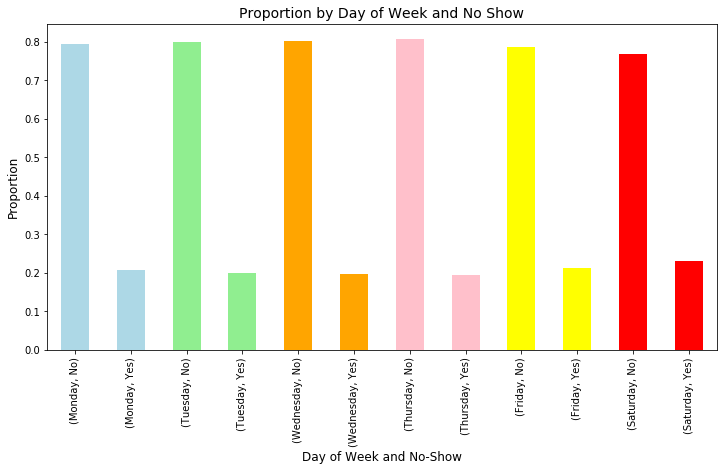

In [43]:
color_list = ['lightblue', 'lightblue', 'lightgreen', 'lightgreen', 'orange', 'orange',
             'pink', 'pink', 'yellow', 'yellow', 'red', 'red']
counts.plot(kind='bar', figsize=(12,6), color=color_list)
plt.title('Proportion by Day of Week and No Show', fontsize=14)
plt.xlabel('Day of Week and No-Show', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.show()

From the above plot, it can be observed that for all the days, **Similar Proportion** of *No-Shows* can be observed. Hence, it can be said that the Day of the Appointment does not affect the likelihood of No-Show.

<a id='conclusions'></a>
## Conclusions
### Results
1. Almost 2/3 of the Clinic's Appointments were scheduled for Female Patients.
2. **Alcoholic Patients** have scheduled most number of appointments, whereas **Handicapped Patients** have scheduled the least number of appointments.
3. 90% of the appointments were scheduled by patients who **Do Not Receive Scholarships**.
4. The Clinic has most number of appointments on **Tuesday & Wednesday** and the least number of appointments on **Saturday**.
5. Patients who **Receive Scholarship** are more likely to be No-Show when compared to patients who **Do Not Receive Scholarship**.
6. **Non Handicapped Patients** are more likely to be No-Shows when compared to **Handicapped Patients**.
7. Patients with **Hypertension and Diabetes** are less likely to be No-Shows when compared to **Non-Hypertension and Non-Diabetic Patients**.
8. Patients with **Alocholism** and **Non-Alcoholism** are equally likely to be a No-Show.
9. The **Gender** of the patients does not have any effect on the likelihood of a No-Show.
10. **Patients Age** has no effect on the likelihood of a No-Show.
11. Patients who have **Received a SMS** are more likely to be a No-Show when compared to patients who **Have Not Received a SMS**.<br>

### Limitations
1. The Statistics used in the project for analysis are **Descriptive Statistics** and **Not Inferential Statistics**, thus no experiments were performed, no hypothesis and inferences from data were created.
2. Most of the data in the dataset is **Categorical**, which does not allow Correlation analysis to be performed.
3. The conclusion drawn for **SMS Received**, is based only on the visualisation of the data, and it is not drawn from any other details. The conclusion seems to be counter-intutive, as Patients who receive SMS are more likely of a No-Show. This maybe due to the SMS being sent very early or very close to the appointment. 